### IMPORTING LIBRARIES

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_absolute_error, classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the CSV File
pp_data = pd.read_csv('preprocessed_dataset/preprocessed_adult_data.csv')
pp_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_num
0,39,5,77516,9,12,4,0,1,4,1,2174,0,40,38,0,0
1,50,4,83311,9,12,2,3,0,4,1,0,0,15,38,0,0
2,38,2,215646,11,8,0,5,1,4,1,0,0,40,38,0,0
3,53,2,234721,1,6,2,5,0,2,1,0,0,40,38,0,0
4,28,2,338409,9,12,2,9,5,2,0,0,0,40,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45170,33,2,245211,9,12,4,9,3,4,1,0,0,40,38,0,0
45171,39,2,215419,9,12,0,9,1,4,0,0,0,36,38,0,0
45172,38,2,374983,9,12,2,9,0,4,1,0,0,50,38,0,0
45173,44,2,83891,9,12,0,0,3,1,1,5455,0,40,38,0,0


#### NORMALIZATION (Scaling of values - StandardScalar)

In [4]:
X = pp_data[['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain']]
y = pp_data['income']

In [5]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### TRAIN/TEST SPLIT

In [6]:
# Splitting train, test variables, where test is 20% of the dataframe.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
X_train.shape, X_test.shape

((36140, 11), (9035, 11))

In [8]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain
26221,1.449251,1.873000,1.040669,0.179935,-0.438652,-0.389548,-0.985997,-0.884386,0.38423,0.693823,-0.276684
4650,0.747149,-0.213500,0.058085,-0.082049,2.304605,-0.389548,0.752350,-0.884386,0.38423,0.693823,-0.276684
8223,-0.032964,-2.299999,1.250810,1.227870,-0.046758,-1.722363,-1.482668,1.619351,0.38423,-1.441290,-0.276684
12337,-0.188987,-0.213500,-0.250820,-0.868000,0.737029,-0.389548,-1.482668,-0.884386,0.38423,0.693823,-0.276684
16573,0.123058,-0.213500,0.024462,0.179935,-0.438652,-0.389548,0.255680,-0.884386,0.38423,0.693823,-0.276684


### MODEL TRAINING & MODEL PERFORMANCE METRICS

### NAÏVE BAYES

In [9]:
# Creating a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
gnb = model.fit(X_train,y_train)

# Predictions on the test set
gnb_predictions = gnb.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:")
print(classification_report(y_test, gnb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.8148312119535142
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      6830
           1       0.67      0.48      0.56      2205

    accuracy                           0.81      9035
   macro avg       0.76      0.70      0.72      9035
weighted avg       0.80      0.81      0.80      9035



In [10]:
model.score(X_train, y_train)

0.8123132263420033

In [11]:
model.score(X_test, y_test)

0.8148312119535142

Random Prediction: ROC AUC=0.500
Naïve Bayes: ROC AUC=0.849


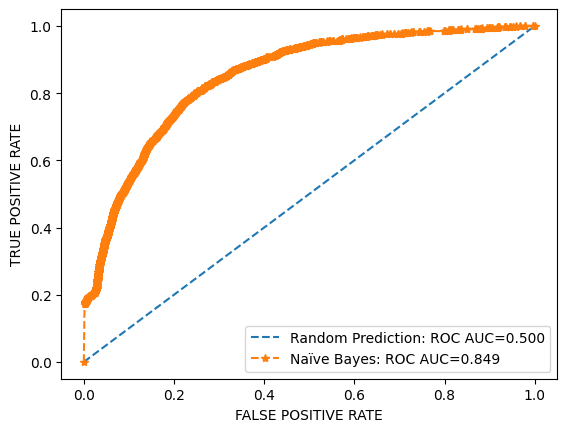

In [12]:
# Predict probabilities
nb_probs = model.predict_proba(X_test)

# Keep probabilities for the positive outcome only
nb_probs1 = nb_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Naïve Bayes: ROC AUC=%.3f' % (nb_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naïve Bayes: ROC AUC=%.3f' % (nb_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()


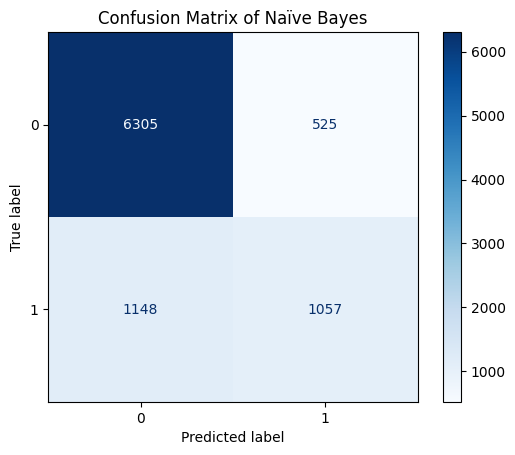

In [13]:
# Display the confusion matrix
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Naïve Bayes")
plt.show()

### RANDOM FOREST

In [14]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4] 
}

# Initialize the classifier
random= RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best estimator to make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.8516603134301916


In [15]:
# Evaluate Naïve Bayes Classifier
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classifier:
Accuracy: 0.8587714443829552
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6830
           1       0.75      0.63      0.69      2205

    accuracy                           0.86      9035
   macro avg       0.82      0.78      0.80      9035
weighted avg       0.85      0.86      0.85      9035



In [20]:
grid_search.score(X_train, y_train)

0.8847260653016049

In [18]:
grid_search.score(X_test, y_test)

0.8587714443829552

Random Prediction: ROC AUC=0.500
Random Forest: ROC AUC=0.908


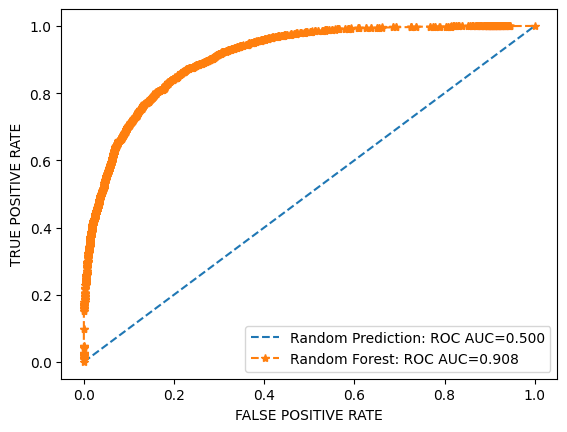

In [21]:
# Predict probabilities
rf_probs = grid_search.predict_proba(X_test)
# Keep probabilities for the positive outcome only
rf_probs1 = rf_probs[:, 1]

ns_probs = [0 for _ in range(len(y_test))]

# Calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
rf_auc = roc_auc_score(y_test, rf_probs1)

# Summarize scores
print('Random Prediction: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))

# Calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs1)

# Plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.legend()
plt.show()

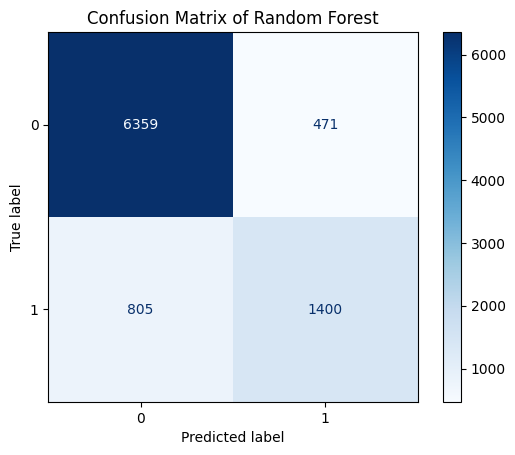

In [23]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=grid_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix of Random Forest")
plt.show()

### COMPARING THE TWO MODELS

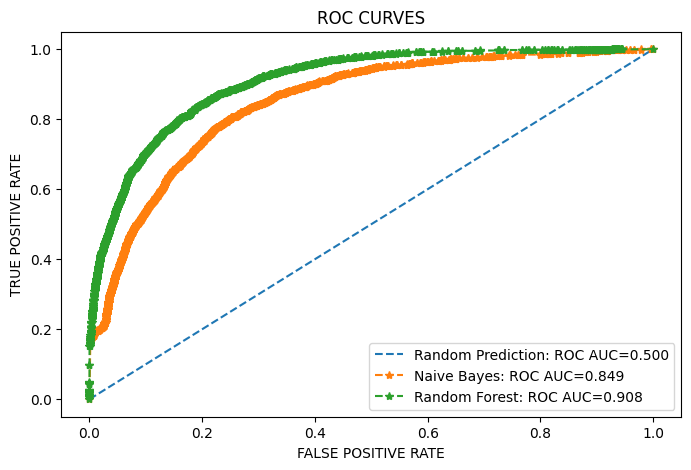

In [24]:
plt.figure(figsize=(8,5))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Prediction: ROC AUC=%.3f' % (ns_auc))
plt.plot(nb_fpr, nb_tpr, linestyle='--',marker='*',label='Naive Bayes: ROC AUC=%.3f' % (nb_auc))
plt.plot(rf_fpr, rf_tpr, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (rf_auc))

plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
plt.legend()
plt.show()

In [25]:
random_forest_accuracy = grid_search.score(X_test, y_test)
naïve_bayes_accuracy = model.score(X_test, y_test)

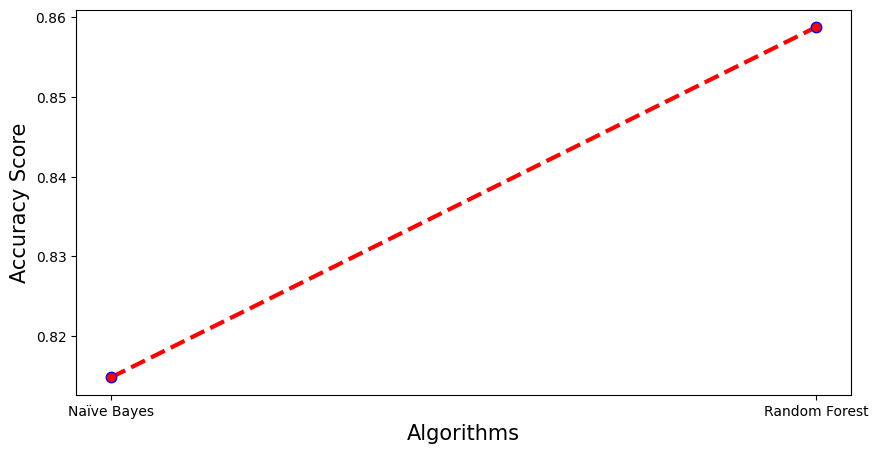

In [26]:
# Comparing Different algorithm models with their respective accuracy.
x=['Naïve Bayes','Random Forest']
y=[naïve_bayes_accuracy, random_forest_accuracy]

plt.figure(1,figsize=(10,5))

plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")
plt.xlabel("Algorithms",fontsize=15)
plt.ylabel("Accuracy Score",fontsize=15)

plt.show() 